
## Autoregressive Model Analysis


For this assignment I will be doing autoregressive analysis on the <i>Appliances</i> column of the data set [
Appliances energy prediction](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#)


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# I used this function to format my date.
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d %H:%M:%S')

In [4]:
# Since I only need the date and appliance cols for this task, I only #selected these two.
col_list = ["date", "Appliances"]
rawDf = pd.read_csv('data/energydata_complete.csv',parse_dates=[0], squeeze=True, date_parser=parser,usecols=col_list)

### 1. Plotting Data

In [5]:
rawDf = rawDf.set_index('date')

<AxesSubplot:xlabel='date'>

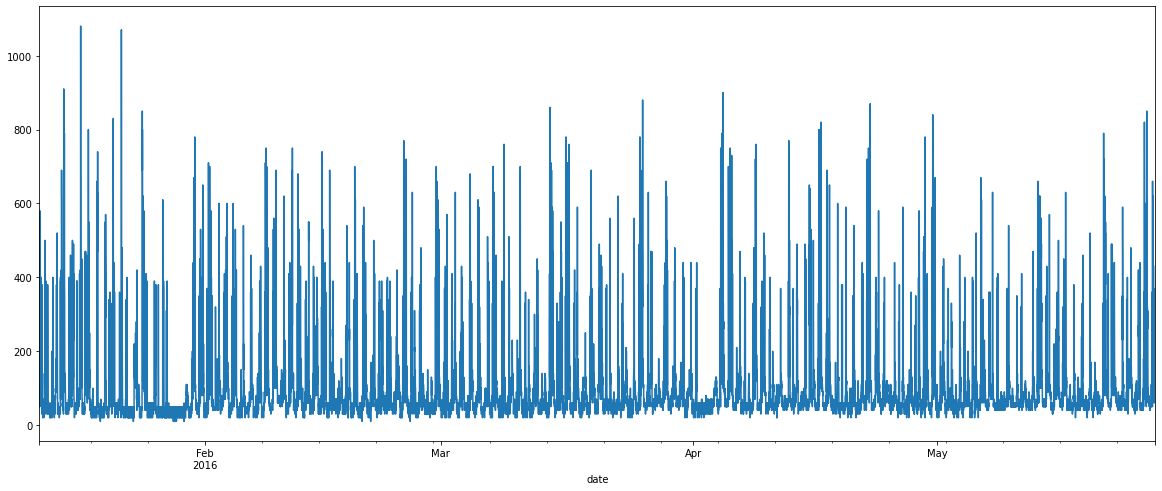

In [6]:
rawDf["Appliances"].plot(figsize=(20,8))

I am going to draw another plot of the same data over the sample of max temprature during the day because it is little difficult to notice much change in a dense representation of the data.

<AxesSubplot:xlabel='date'>

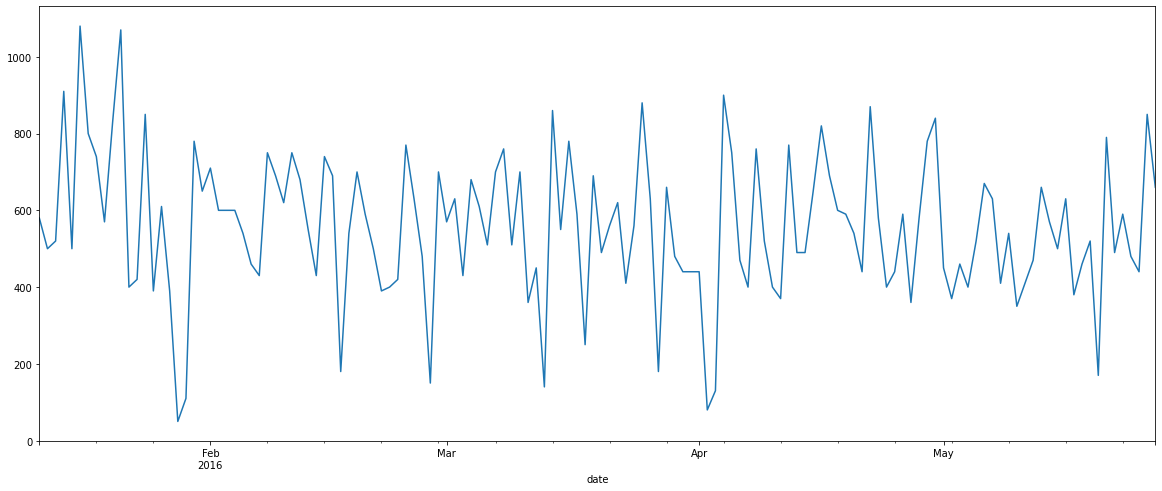

In [7]:
highs = rawDf["Appliances"].resample("D").max()
plt.figure(figsize=(20,8))
highs.plot()

From the graph we can see that the energy usage during winter(Specifically in January) is very high. This is directly related to the cold weather during this season. So, We can assume that there is some seasonality in our data and this violates the non-seasonality property of our timeseries data.

## 2. Preprocessing data

We can observe that our data goes up and down a lot and the first thing we do before feeding the data to our model is to <b>NORMALIZE</b> our data.


In [9]:
# because our data goes from 50 to 1000
avg, dev = rawDf.mean(), rawDf.std()
normalizedDf = (rawDf - avg) / dev

In [10]:
normalizedDf.head()

,Appliances
date,
2016-01-11 17:00:00,-0.367666
2016-01-11 17:10:00,-0.367666
2016-01-11 17:20:00,-0.465204
2016-01-11 17:30:00,-0.465204
2016-01-11 17:40:00,-0.367666


<AxesSubplot:xlabel='date'>

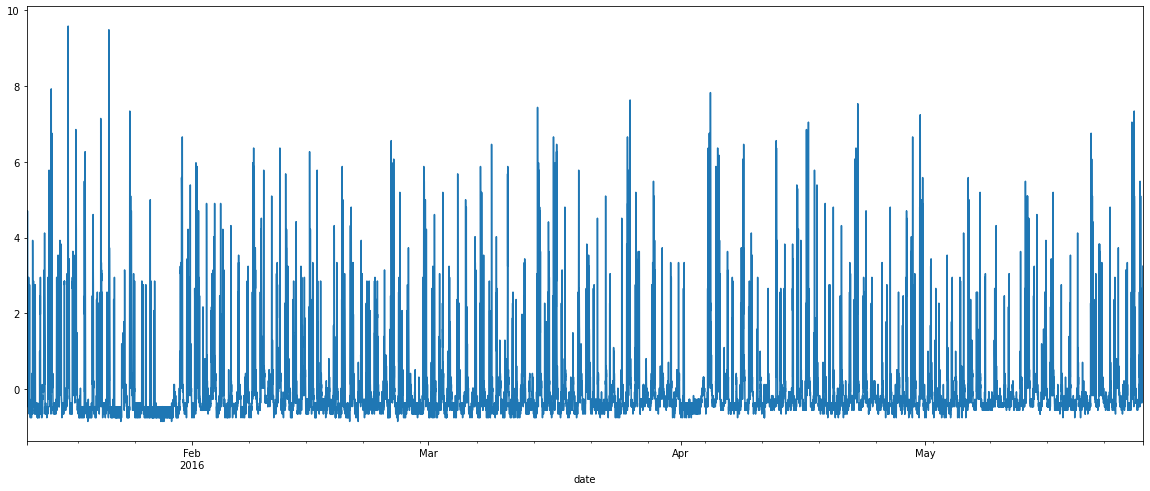

In [11]:
normalizedDf["Appliances"].plot(figsize=(20,8))

Normalizing the data wont change the graph of the data. The graph exactly looks similar to before only the range changes. Mean is centered around zero and sd = 1.

### 2. Splitting Time series

// Detail note will be added

In [20]:
train = normalizedDf[0:11559] # The first three months
test = normalizedDf[11560:]  

### 3. Training my model

// Detail note will be added

In [21]:
autoModel =  auto_arima(train,trace=True,max_P=30,max_D=5,max_q=5,seasonal=True)

/opt/anaconda3/envs/nlpPisa2020/lib/python3.8/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=23516.948, Time=19.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=33740.821, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23916.300, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=26989.557, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33739.365, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=23720.089, Time=4.87 sec
/opt/anaconda3/envs/nlpPisa2020/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=23804.982, Time=9.62 sec
 

Auto ARIMA gave us the best model to use for our data. <br>
Best model:  ARIMA(3,0,3)(0,0,0)

In [30]:
model = ARIMA(train, order=(3,0,3))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Appliances   No. Observations:                11559
Model:                     ARMA(3, 3)   Log Likelihood              -11726.798
Method:                       css-mle   S.D. of innovations              0.667
Date:                Fri, 19 Mar 2021   AIC                          23469.597
Time:                        12:28:21   BIC                          23528.439
Sample:                    01-11-2016   HQIC                         23489.372
                         - 03-31-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0064      0.038      0.168      0.867      -0.069       0.082
ar.L1.Appliances     2.3810      0.028     86.376      0.000       2.327       2.435
ar.L2.Appliances    -1.8821      0.045    -41.672      0.000      -1.971      -1.794
ar.L3.Appliances     0.4936      0.020     24.709      0.000       0.454       0.533
ma.L1.Appliances    -1.5880      0.028    -55.842      0.000      -1.644      -1.532
ma.L2.Appliances     0.4712      0.034     13.880      0.000       0.405       0.538
ma.L3.Appliances     0.1634      0.015     10.650      0.000       0.133       0.193
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1829           -0.0256j            1.1832           -0.0034
AR.2            1.1829           +0.0256j            1.1832            0.0034
AR.3            1.4472           -0.0000j            1.4472           -0.0000
MA.1            1.0826           -0.2006j            1.1011           -0.0292
MA.2            1.0826           +0.2006j            1.1011            0.0292
MA.3           -5.0496           -0.0000j            5.0496           -0.5000
-----------------------------------------------------------------------------
"""

## Forecasting the future

In [55]:
history = [x for x in train["Appliances"]]
predictions = list()

In [64]:
for t in range(len(test)):
    model = ARIMA(history, order=(3,0,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    obs = test["Appliances"][t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


redicted=-0.417553, expected=-0.562741
predicted=-0.475080, expected=-0.367666
predicted=-0.310426, expected=-0.465204
predicted=-0.420231, expected=-0.465204
predicted=-0.397765, expected=-0.367666
predicted=-0.323801, expected=-0.562741
predicted=-0.490805, expected=-0.465204
predicted=-0.378799, expected=-0.465204
predicted=-0.399335, expected=-0.465204
predicted=-0.393681, expected=-0.562741
predicted=-0.470462, expected=-0.367666
predicted=-0.299976, expected=-0.465204
predicted=-0.409696, expected=-0.367666
predicted=-0.309516, expected=-0.465204
predicted=-0.404855, expected=-0.562741
predicted=-0.461643, expected=-0.465204
predicted=-0.372536, expected=-0.660278
predicted=-0.544367, expected=-0.757816
predicted=-0.588706, expected=-0.562741
predicted=-0.428632, expected=-0.562741
predicted=-0.464088, expected=-0.270129
predicted=-0.229239, expected=-0.465204
predicted=-0.431999, expected=-0.465204
predicted=-0.392661, expected=-0.562741
predicted=-0.477782, expected=-0.465204
p

TypeError: object of type 'NoneType' has no len()

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()